# Task - 1

## Q1: Create a function to convert RGB to Grey scale image. Use numpy, pytorch, or tf but don't direct available functions.

Hint: Use the formula: Gray = 0.299*R + 0.587*G + 0.114*B for the conversion.


### Soulution :

In [17]:
def rgb2gray(image):
  r_weight = 0.2989
  g_weight = 0.5870
  b_weight = 0.1140

  gray_image = (r_weight * image[:,:,0]) + (g_weight * image[:,:,1]) + (b_weight * image[:,:,2])
  return gray_image

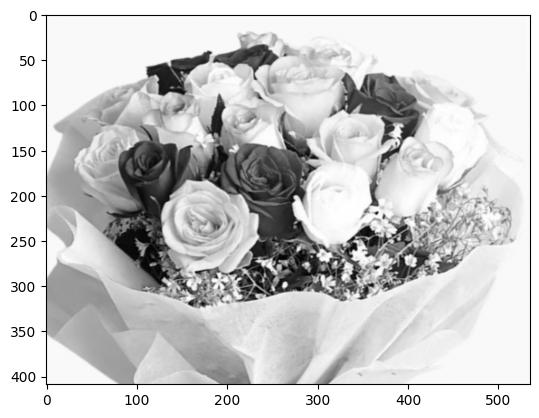

In [25]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/roses.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = rgb2gray(img_rgb)
plt.imshow(res, cmap='gray')
plt.show()

In [15]:
import torch
import torchvision.transforms as transforms

def rgb_to_grayscale_torch(image):
    # Convert the image to a PyTorch tensor
    image = transforms.ToTensor()(image)

    # Define the weights for the RGB channels
    weights = torch.tensor([0.2989, 0.5870, 0.1140])

    # Reshape the weights for broadcasting
    weights = weights.view(3, 1, 1)

    # Apply the weights to the image and sum to get the grayscale image
    grayscale_image = torch.sum(weights * image, dim=0)

    return grayscale_image

## Q2 : Create a function to convolve_image taking image, kernel as input and returned convolved image.

Hint :  Easy Pesy - done in the class.  

### Solution :

In [28]:
import numpy as np
def convolve(image,kernel):
  img_ht,img_wd = image.shape
  ker_ht,ker_wd = kernel.shape

  res_ht = img_ht - ker_ht + 1
  res_wd = img_wd - ker_wd + 1

  res = np.zeros((res_ht,res_wd))

  for i in range(res_ht):
    for j in range(res_wd):
      region = image[i:i+ker_ht,j:j+ker_wd]
      res[i,j] = np.sum(region * kernel)

  return res

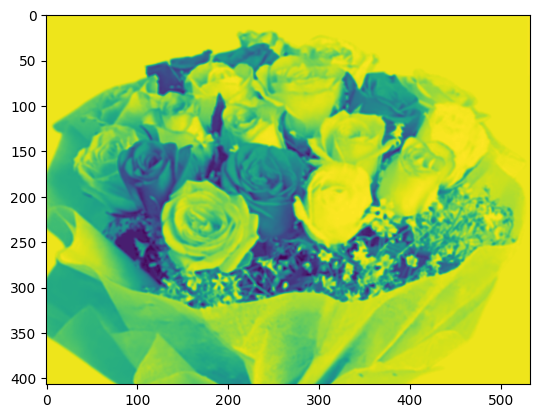

In [35]:
# Load a grayscale image using OpenCV
image = cv2.imread('/content/roses.png', cv2.IMREAD_GRAYSCALE)

# Define a sample kernel (e.g. Sobel edge detection kernel)
kernel = np.array([[0.111,    0.111,    0.111],
[0.111,    0.111,    0.111],
[0.111,    0.111,    0.111]])


res = convolve(image,kernel)
plt.imshow(res)

## Q3 : Apply Below Kernels - Note the effects you observe

1. ```
[[0, 0, 0],
 [0, 1, 0],
 [0, 0, 0]]
```

2. ```
[[-1, -1, -1],
 [-1,  8, -1],
 [-1, -1, -1]]
 ```

3. ```
[[-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]]
```

4. ```
 [[-1, -2, -1],
 [0,  0,  0],
 [1,  2,  1]]
 ```


5. ```
 [[ 0, -1,  0],
 [-1,  5, -1],
 [ 0, -1,  0]]
 ```

6. ```
 [[-1, -1, -1],
 [-1,  8, -1],
 [-1, -1, -1]]
 ```
7. ```
[[-2, -1,  0],
 [-1,  1,  1],
 [ 0,  1,  2]]
```

8. ```
[[0.111,	0.111,	0.111]
[0.111,	0.111,	0.111]
[0.111,	0.111,	0.111]]
```

## Solution

## Question 4: Image Filtering and Transformation
**Task**: Implement a function to perform image filtering and transformation that includes:

* **Filtering**: Apply a Gaussian blur to the image to reduce noise and smooth the image.
* **Transformation**: Apply a rotation to the image by a specified angle.


Hints:
* For Gaussian blur, you can create a Gaussian kernel and apply it using convolution. https://en.wikipedia.org/wiki/Gaussian_blur
* For rotation, compute the rotation matrix and use cv2.warpAffine. https://theailearner.com/tag/cv2-warpaffine/


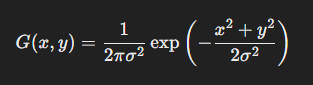


### Solution :

In [39]:
def gaussian_kernel(size,sigma):
  if size % 2 == 0:
    size += 1

  ax = np.linspace(-(size // 2), (size // 2), size)
  xx, yy = np.meshgrid(ax, ax)

  #compute kernel
  kernel = np.exp(-0.5 * (xx**2 + yy**2) / sigma**2)

  #Normalize the kernel
  kernel /= (2 * np.pi * sigma**2)
  kernel /= np.sum(kernel)

  return kernel

In [40]:
def apply_filter_and_transform(image, sigma, angle):
  if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  kernel_size = int(6 * sigma + 1)

  kernel = gaussian_kernel(kernel_size, sigma)
  depth = -1 # (-1 for all depth available)
  blurred_image = cv2.filter2D(image, -1, kernel)

  center = (blurred_image.shape[1] / 2, blurred_image.shape[0] / 2)
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated_image = cv2.warpAffine(blurred_image, rotation_matrix, (blurred_image.shape[1], blurred_image.shape[0]))

  return blurred_image, rotated_image

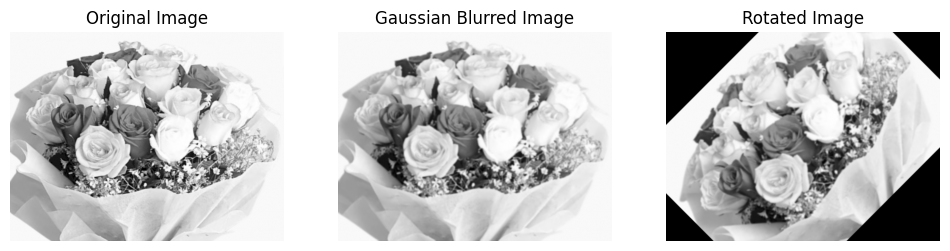

In [41]:
image = cv2.imread('/content/roses.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur and rotation
sigma = 1.0  # Standard deviation for Gaussian kernel
angle = 45.0  # Angle for rotation
blurred_image, rotated_image = apply_filter_and_transform(image, sigma, angle)

# Display the images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gaussian Blurred Image
plt.subplot(1, 3, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

# Rotated Image after Gaussian Blur
plt.subplot(1, 3, 3)
plt.title('Rotated Image')
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')

plt.show()

## Question 5: Normalization

Apply different Image Normalization technique from scratch and visualize the effect.

* Do normalization - see effect on min, max, mean, std value
* See changes in Pixel Distribution

### Solution

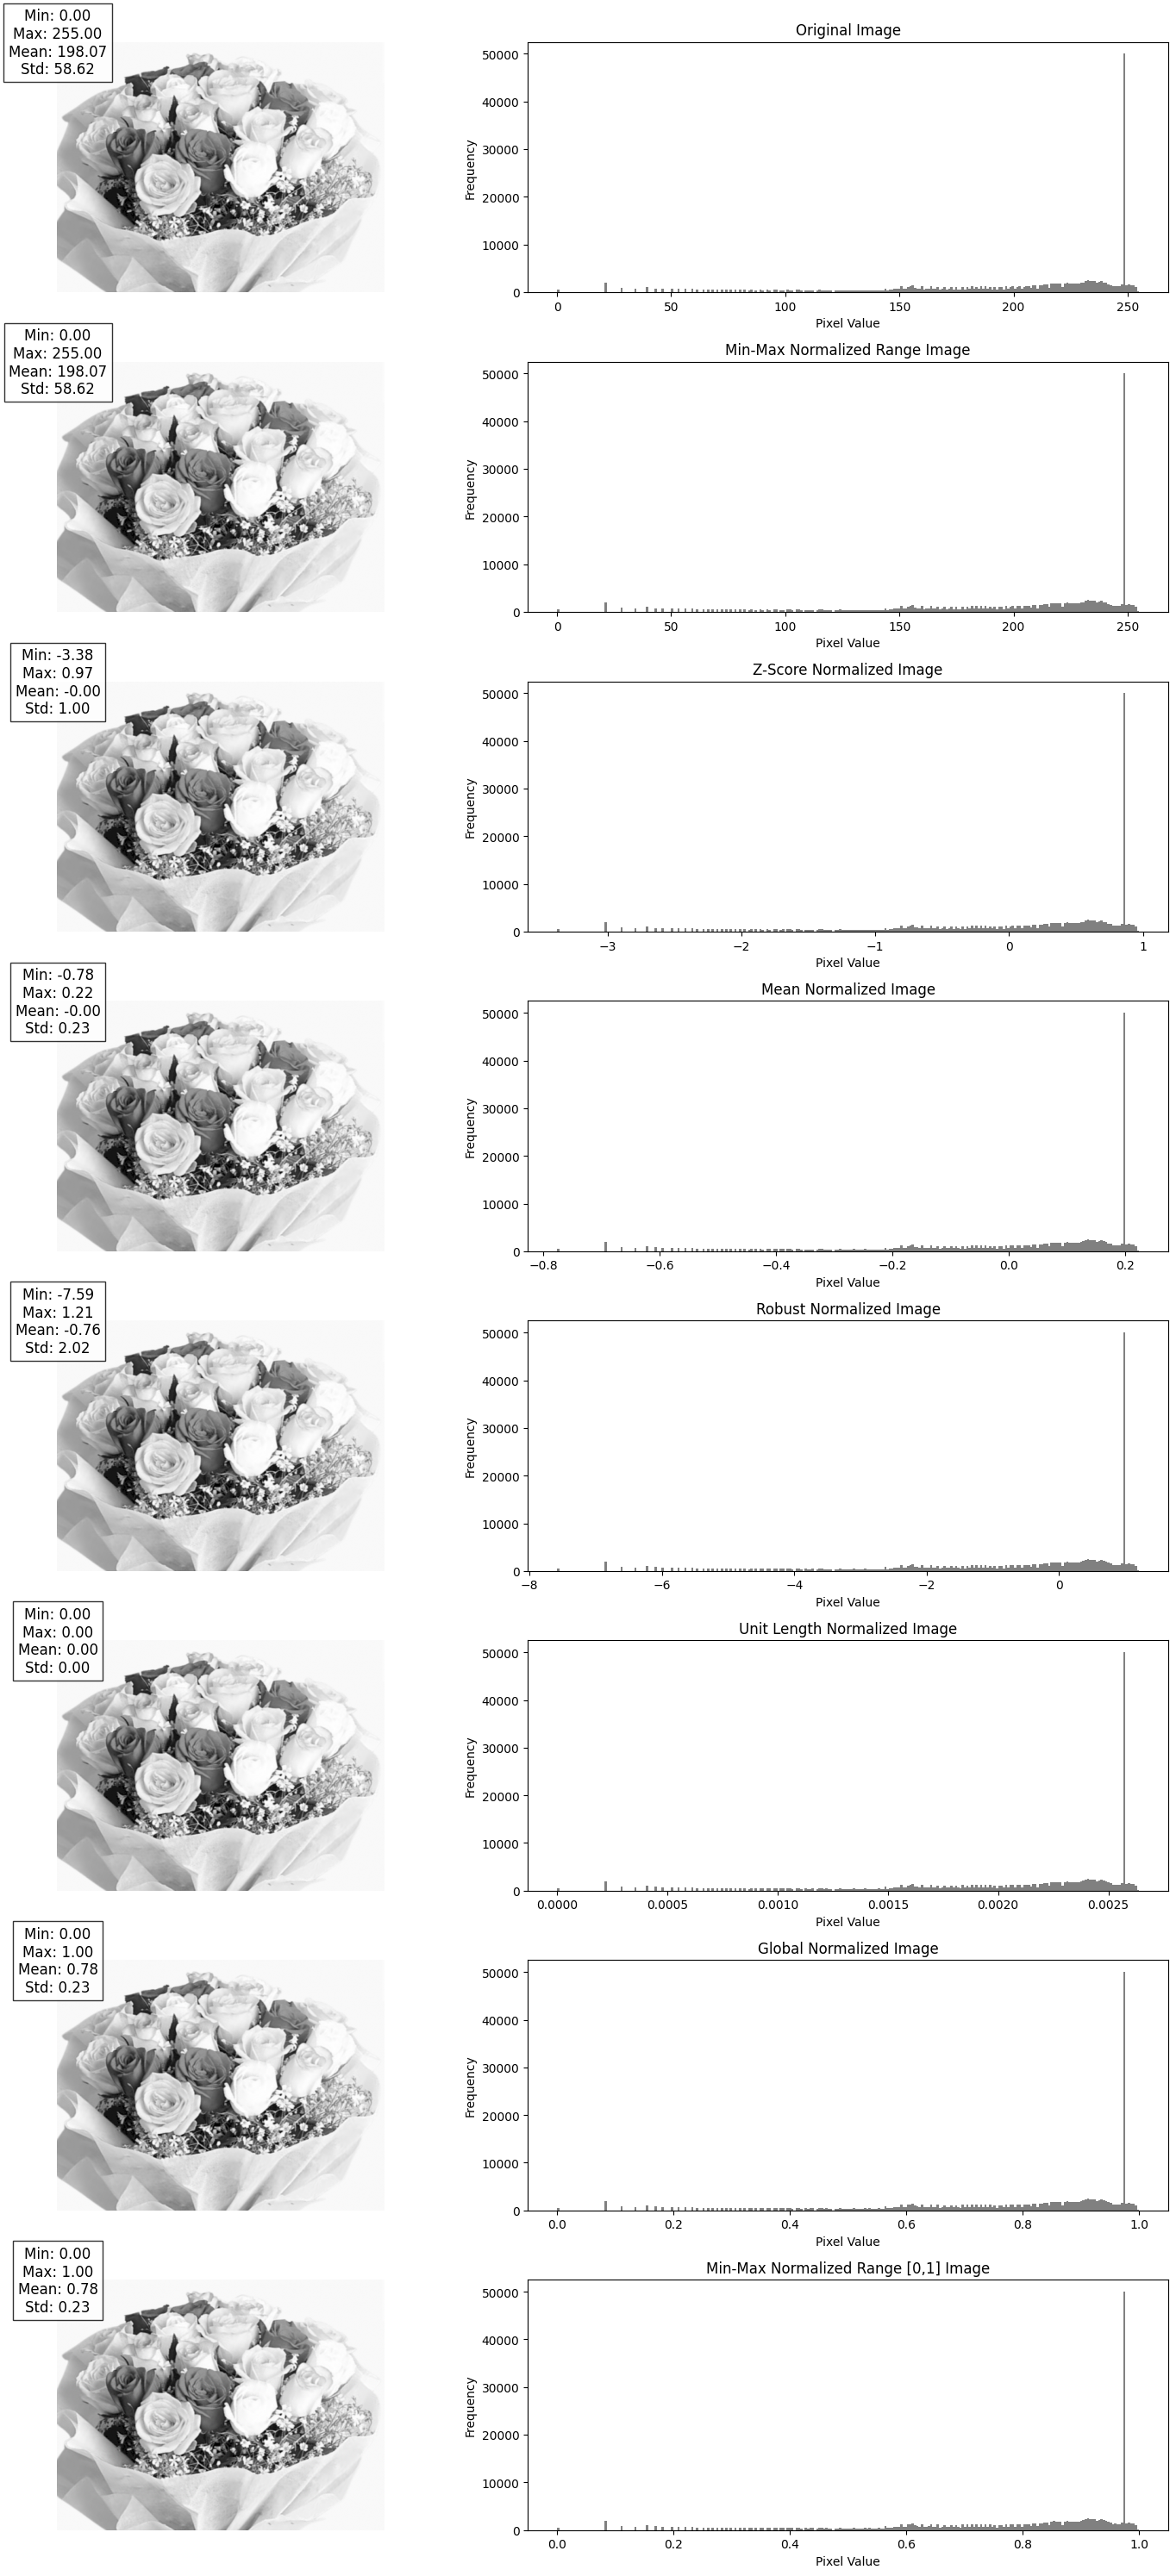

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/roses.png', cv2.IMREAD_GRAYSCALE).astype(int)

def compute_statistics(image: np.ndarray) -> dict:
    """Compute and return image statistics."""
    stats = {
        'Min': np.min(image),
        'Max': np.max(image),
        'Mean': np.mean(image),
        'Std': np.std(image)
    }
    return stats

def min_max_normalize_to_range(image, min_range= 0, max_range = 255) :
    """Normalize the image to a specific range."""
    min_image = np.min(image)
    max_image = np.max(image)
    # Apply Min-Max normalization to the desired range
    normalized_image = min_range + ((image - min_image) * (max_range - min_range)) / (max_image - min_image)
    return normalized_image

def z_score_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Z-Score Normalization."""
    mean = np.mean(image)
    std = np.std(image)
    return (image - mean) / std

def mean_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Mean Normalization."""
    mean = np.mean(image)
    return (image - mean) / (np.max(image) - np.min(image))

def robust_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Robust Normalization."""
    median = np.median(image)
    mad = np.median(np.abs(image - median))
    return (image - median) / mad

def unit_length_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Unit Length Normalization."""
    norm = np.sqrt(np.sum(image**2))
    return image / norm if norm != 0 else image

def global_normalization(image: np.ndarray) -> np.ndarray:
    """Normalize the image using Global Normalization."""
    min_global = np.min(image)
    max_global = np.max(image)
    return (image - min_global) / (max_global - min_global)

def plot_image_and_histogram(image: np.ndarray, ax_img, ax_hist, title: str):
    """Plot image and histogram."""
    # Display image
    ax_img.imshow(image, cmap='gray')
    ax_img.axis('off')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=256, color='gray', range=[image.min(), image.max()])
    ax_hist.set_title(title)
    ax_hist.set_xlabel('Pixel Value')
    ax_hist.set_ylabel('Frequency')

# Apply normalization techniques
min_max_img_range = min_max_normalize_to_range(image, 0, 255)
min_max_img = min_max_normalize_to_range(image, 0, 1)

z_score_img = z_score_normalization(image)
mean_img = mean_normalization(image)
robust_img = robust_normalization(image)
unit_length_img = unit_length_normalization(image)
global_img = global_normalization(image)

# Compute statistics for original and normalized images
original_stats = compute_statistics(image)
min_max_stats = compute_statistics(min_max_img)
min_max_img_range_stats = compute_statistics(min_max_img_range)
z_score_stats = compute_statistics(z_score_img)
mean_stats = compute_statistics(mean_img)
robust_stats = compute_statistics(robust_img)
unit_length_stats = compute_statistics(unit_length_img)
global_stats = compute_statistics(global_img)

# Display statistics
def display_stats(ax, stats):
    """Display statistics on the given axis."""
    stats_text = (f"Min: {stats['Min']:.2f}\n"
                  f"Max: {stats['Max']:.2f}\n"
                  f"Mean: {stats['Mean']:.2f}\n"
                  f"Std: {stats['Std']:.2f}")
    ax.text(0.5, 0.5, stats_text, fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))

# Plot images and histograms
fig, axs = plt.subplots(8, 2, figsize=(15, 30))
axs = axs.flatten()

# Original Image
plot_image_and_histogram(image, axs[0], axs[1], 'Original Image')
display_stats(axs[0], original_stats)

# Min-Max Normalized Range Image
plot_image_and_histogram(min_max_img_range, axs[2], axs[3], 'Min-Max Normalized Range Image')
display_stats(axs[2], min_max_img_range_stats)


# Z-Score Normalized Image
plot_image_and_histogram(z_score_img, axs[4], axs[5], 'Z-Score Normalized Image')
display_stats(axs[4], z_score_stats)

# Mean Normalized Image
plot_image_and_histogram(mean_img, axs[6], axs[7], 'Mean Normalized Image')
display_stats(axs[6], mean_stats)

# Robust Normalized Image
plot_image_and_histogram(robust_img, axs[8], axs[9], 'Robust Normalized Image')
display_stats(axs[8], robust_stats)

# Unit Length Normalized Image
plot_image_and_histogram(unit_length_img, axs[10], axs[11], 'Unit Length Normalized Image')
display_stats(axs[10], unit_length_stats)

# Global Normalized Image
plot_image_and_histogram(global_img, axs[12], axs[13], 'Global Normalized Image')
display_stats(axs[12], global_stats)

# Min-Max Normalized Image
plot_image_and_histogram(min_max_img, axs[14], axs[15], 'Min-Max Normalized Range [0,1] Image')
display_stats(axs[14], min_max_stats)

plt.tight_layout()
plt.show()


# Happy Learning !
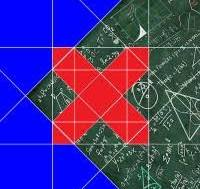
